<a href="https://colab.research.google.com/github/PseudoPythonista/nlp/blob/master/unsupervised_clothing_ecommerce_reviews_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [ ]:
data[data["Rating"]==3]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
10,10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.,3,0,14,General,Dresses,Dresses
14,14,1077,50,Pretty party dress with some issues,This is a nice choice for holiday gatherings. i like that the length grazes the knee so it is conservative enough for office related gatherings. the size small fit me well - i am usually a size 2/4 with a small bust. in my opinion it runs small and those with larger busts will definitely have to size up (but then perhaps the waist will be too big). the problem with this dress is the quality. the fabrics are terrible. the delicate netting type fabric on the top layer of skirt got stuck in the zip,3,1,1,General,Dresses,Dresses
16,16,1065,34,"You need to be at least average height, or taller","Material and color is nice. the leg opening is very large. i am 5'1 (100#) and the length hits me right above my ankle. with a leg opening the size of my waist and hem line above my ankle, and front pleats to make me fluffy, i think you can imagine that it is not a flattering look. if you are at least average height or taller, this may look good on you.",3,1,2,General,Bottoms,Pants
23,23,1077,34,"Like it, but don't love it.","Cute little dress fits tts. it is a little high waisted. good length for my 5'9 height. i like the dress, i'm just not in love with it. i dont think it looks or feels cheap. it appears just as pictured.",3,1,0,General,Dresses,Dresses
...,...,...,...,...,...,...,...,...,...,...,...
23462,23462,999,24,Its okay,The pattern of this skirt is adorable and looks better in person but the fabric isnt the best. it feels like an elastic fabric and is way to volumous. overall not my favorite.,3,1,0,General,Bottoms,Skirts
23475,23475,1104,41,Cute dress,Cute dress but not for me. the waist is too high and the sleeves are tight. maybe on a different body type this dress would be perfect. i returned it.,3,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me but maybe for others. just ok.",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have been great.",3,0,1,General Petite,Dresses,Dresses


In [ ]:
data.shape

(23486, 11)

In [ ]:
data.isnull().sum()

Unnamed: 0                 0   
Clothing ID                0   
Age                        0   
Title                      3810
Review Text                845 
Rating                     0   
Recommended IND            0   
Positive Feedback Count    0   
Division Name              14  
Department Name            14  
Class Name                 14  
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(19662, 11)

In [ ]:
data_s = data[["Review Text","Rating"]]

In [ ]:
data_s.head()

,Review Text,Rating
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5
5,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",2
6,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",5


In [ ]:
#reset index
data_s.reset_index(drop=True, inplace=True)

In [ ]:
mapper = {1:"neg",2:"neg",3:"neg",4:"pos",5:"pos"}
data_s["Rating"] = data_s["Rating"].map(mapper)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data_s.head()

,Review Text,Rating
0,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",neg
1,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",pos
2,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,pos
3,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",neg
4,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",pos


In [ ]:
data_s["Rating"].value_counts()

pos    15147
neg    4515 
Name: Rating, dtype: int64

In [ ]:
#blanks?
blanks = []

for ind,rev,lb in data_s.itertuples(): 
    if type(rev)==str:            
        if rev.isspace():         
            blanks.append(ind)     
blanks

[]

In [ ]:
for col in data_s.columns:
  print(f'{col} is {data[col].dtype.name}')

Review Text is object
Rating is int64


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
data_s['scores'] = data_s['Review Text'].apply(lambda review: sid.polarity_scores(review))

data_s['compound']  = data_s['scores'].apply(lambda score_dict: score_dict['compound'])

data_s['comp_score'] = data_s['compound'].apply(lambda c: 'pos' if c >=0.8 else 'neg')
#data_s['comp_score'] = data_s['compound'].apply(lambda c: 'pos' if c >=0.2 else 'neg' if c<= -0.2 else "neu") <--- just pos and neg

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [ ]:
data_s.head()

,Review Text,Rating,scores,compound,comp_score
0,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",neg,"{'neg': 0.027, 'neu': 0.792, 'pos': 0.181, 'compound': 0.9427}",0.9427,pos
1,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",pos,"{'neg': 0.226, 'neu': 0.34, 'pos': 0.434, 'compound': 0.5727}",0.5727,neg
2,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,pos,"{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.9291}",0.9291,pos
3,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",neg,"{'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.9419}",0.9419,pos
4,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",pos,"{'neg': 0.023, 'neu': 0.881, 'pos': 0.096, 'compound': 0.8004}",0.8004,pos


In [ ]:
confusing_reviews = data_s[data_s['Rating'] == "neg"] 
pd.set_option('display.max_colwidth', 0)
confusing_reviews

,Review Text,Rating,scores,compound,comp_score
0,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",neg,"{'neg': 0.027, 'neu': 0.792, 'pos': 0.181, 'compound': 0.9427}",0.9427,pos
3,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",neg,"{'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.9419}",0.9419,pos
8,Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.,neg,"{'neg': 0.044, 'neu': 0.877, 'pos': 0.079, 'compound': 0.3578}",0.3578,neg
11,This is a nice choice for holiday gatherings. i like that the length grazes the knee so it is conservative enough for office related gatherings. the size small fit me well - i am usually a size 2/4 with a small bust. in my opinion it runs small and those with larger busts will definitely have to size up (but then perhaps the waist will be too big). the problem with this dress is the quality. the fabrics are terrible. the delicate netting type fabric on the top layer of skirt got stuck in the zip,neg,"{'neg': 0.074, 'neu': 0.752, 'pos': 0.174, 'compound': 0.8176}",0.8176,pos
13,"Material and color is nice. the leg opening is very large. i am 5'1 (100#) and the length hits me right above my ankle. with a leg opening the size of my waist and hem line above my ankle, and front pleats to make me fluffy, i think you can imagine that it is not a flattering look. if you are at least average height or taller, this may look good on you.",neg,"{'neg': 0.027, 'neu': 0.896, 'pos': 0.077, 'compound': 0.5773}",0.5773,neg
...,...,...,...,...,...
19652,Cute dress but not for me. the waist is too high and the sleeves are tight. maybe on a different body type this dress would be perfect. i returned it.,neg,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.7935}",0.7935,neg
19655,I was surprised at the positive reviews for this product. its terrible! it cuts you in a weird place to make you look wide. the skirt is also not like the picture. its darker and heavier. the material isnt great. i had to return.,neg,"{'neg': 0.243, 'neu': 0.651, 'pos': 0.105, 'compound': -0.7348}",-0.7348,neg
19658,"It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me but maybe for others. just ok.",neg,"{'neg': 0.068, 'neu': 0.735, 'pos': 0.197, 'compound': 0.6652}",0.6652,neg
19659,"This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have been great.",neg,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.9343}",0.9343,pos


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
accuracy_score(data_s['Rating'],data_s['comp_score'])

0.7378700030515716

In [ ]:
print(classification_report(data_s['Rating'],data_s['comp_score']))

              precision    recall  f1-score   support

         neg       0.45      0.64      0.53      4515
         pos       0.88      0.77      0.82     15147

    accuracy                           0.74     19662
   macro avg       0.66      0.70      0.67     19662
weighted avg       0.78      0.74      0.75     19662



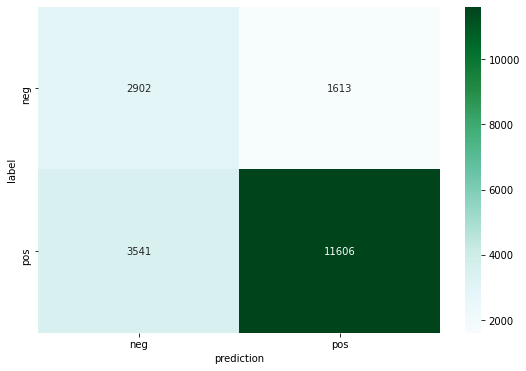

In [ ]:
import seaborn as sn
classes = ["neg","pos"]
arr = confusion_matrix(data_s['Rating'],data_s['comp_score'])
df_cm = pd.DataFrame(arr, classes, classes)
plt.figure(figsize = (9,6))
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label")
plt.show();